第一步
     
     对网页进行访问

In [9]:
from urllib import request
resp = request.urlopen('https://movie.douban.com/nowplaying/hangzhou/')
html_data = resp.read().decode('utf-8')
print(html_data)

<!DOCTYPE html>
<html lang="zh-cmn-Hans" class="">
<head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <meta name="renderer" content="webkit">
    <meta name="referrer" content="always">
    <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />
    <title>
    杭州 - 在线购票&amp;影讯
</title>
    
    <meta name="baidu-site-verification" content="cZdR4xxR7RxmM4zE" />
    <meta http-equiv="Pragma" content="no-cache">
    <meta http-equiv="Expires" content="Sun, 6 Mar 2005 01:00:00 GMT">
    
    
    <meta name="keywords" content="杭州,在线购票,网上电影票预订,优惠电影票,影讯,排片,放映时间,电影票价"/>
    <meta name="description" content="杭州电影院在线优惠购票及影讯排片查询"/>

    <link rel="apple-touch-icon" href="/pics/movie/apple-touch-icon.png">
    <link href="https://img3.doubanio.com/f/shire/bf61b1fa02f564a4a8f809da7c7179b883a56146/css/douban.css" rel="stylesheet" type="text/css">
    <link href="https://img3.doubanio.com/f/shire/ae3f5a3e3085968370b1fc63afcecb22

第二步

    
    得到的html代码进行解析，从里面提取我们需要的数据

In [11]:
from bs4 import BeautifulSoup as bs
soup = bs(html_data, 'html.parser')    
nowplaying_movie = soup.find_all('div', id='nowplaying')
nowplaying_movie_list = nowplaying_movie[0].find_all('li', class_='list-item') 
print(nowplaying_movie_list)

[<li class="list-item" data-actors="屈楚萧 / 吴京 / 李光洁" data-category="nowplaying" data-director="郭帆" data-duration="125分钟" data-enough="True" data-region="中国大陆" data-release="2019" data-score="7.9" data-showed="True" data-star="40" data-subject="26266893" data-title="流浪地球" data-votecount="834538" id="26266893">
<ul class="">
<li class="poster">
<a class="ticket-btn" data-psource="poster" href="https://movie.douban.com/subject/26266893/?from=playing_poster" target="_blank">
<img alt="流浪地球" class="" rel="nofollow" src="https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2545472803.jpg"/>
</a>
</li>
<li class="stitle">
<a class="ticket-btn" data-psource="title" href="https://movie.douban.com/subject/26266893/?from=playing_poster" target="_blank" title="流浪地球">
                                    流浪地球
                                </a>
</li>
<li class="srating">
<span class="rating-star allstar40"></span>
<span class="subject-rate">7.9</span>
</li>
<li class="sbtn">
<a class="ticket-

第三步
    
    
    进行页面分析
    

In [12]:
#在上图中可以看到data-subject属性里面放了电影的id号码，而在img标签的alt属性里面放了电影的名字，
#因此我们就通过这两个属性来得到电影的id和名称。（注：打开电影短评的网页时需要用到电影的id，所以需要对它进行解析）
nowplaying_list = [] 
for item in nowplaying_movie_list:        
        nowplaying_dict = {}        
        nowplaying_dict['id'] = item['data-subject']       
        for tag_img_item in item.find_all('img'):            
            nowplaying_dict['name'] = tag_img_item['alt']            
            nowplaying_list.append(nowplaying_dict)
print(nowplaying_list)

[{'id': '26266893', 'name': '流浪地球'}, {'id': '25986662', 'name': '疯狂的外星人'}, {'id': '30163509', 'name': '飞驰人生'}, {'id': '30263995', 'name': '一吻定情'}, {'id': '30335059', 'name': '熊出没·原始时代'}, {'id': '4840388', 'name': '新喜剧之王'}, {'id': '27039378', 'name': '今夜在浪漫剧场'}, {'id': '30295908', 'name': '小猪佩奇过大年'}, {'id': '27065898', 'name': '神探蒲松龄'}, {'id': '27114416', 'name': '廉政风云'}, {'id': '30331149', 'name': '白蛇：缘起'}, {'id': '30364902', 'name': '五十米之恋'}, {'id': '26971645', 'name': '蓝色生死恋'}, {'id': '27109679', 'name': '密室逃生'}, {'id': '30292587', 'name': '两只小猪之勇闯神秘岛'}, {'id': '26588308', 'name': '死侍2：我爱我家'}, {'id': '26374197', 'name': '蜘蛛侠：平行宇宙'}, {'id': '26394152', 'name': '大黄蜂'}, {'id': '30190607', 'name': '钢铁飞龙之奥特曼崛起'}, {'id': '26346327', 'name': '养家之人'}, {'id': '26834059', 'name': '很高兴遇见·你'}]


In [14]:
#可以看到和豆瓣网址上面是匹配的。这样就得到了最新电影的信息了。接下来就要进行对最新电影短评进行分析了。短评网址为：https://movie.douban.com/subject/26363254/comments?start=0&limit=20
#其中26363254就是电影的id，start=0表示评论的第0条评论

requrl = 'https://movie.douban.com/subject/' + nowplaying_list[0]['id'] + '/comments' +'?' +'start=0' + '&limit=20' 
resp = request.urlopen(requrl) 
html_data = resp.read().decode('utf-8') 
soup = bs(html_data, 'html.parser') 
comment_div_lits = soup.find_all('div', class_='comment') 
print(comment_div_lits)

[<div class="comment">
<h3>
<span class="comment-vote">
<span class="votes">51799</span>
<input type="hidden" value="1635458275">
<a class="j a_show_login" href="javascript:;" onclick="">有用</a>
</input></span>
<span class="comment-info">
<a class="" href="https://www.douban.com/people/luzhiyu/">陆支羽</a>
<span>看过</span>
<span class="allstar50 rating" title="力荐"></span>
<span class="comment-time" title="2019-01-29 20:10:48">
                    2019-01-29
                </span>
</span>
</h3>
<p class="">
<span class="short">1.终于，轮到我们仰望星空。2.后启示录死亡废墟，赛博朋克地下城，以及烟波浩渺的末日想象，缔造了真正意义上的第一部国产硬科幻。3.拖着地球逃离太阳系的惊艳设定，本身便是对“家国情怀”的宏大投射，正应了刘慈欣那句“太阳死了，人还活着”。4.绝不仅仅只是电影工业巨壳下的类型尝试，始终荡涤其间的悲壮气息已然具备了史诗级质感，这是大刘的脑洞宇宙与电影创作团队精益求精造就的惊喜。5.屈楚萧很带感，演活了一个勇敢、中二又不失温情的英雄少年。6.期待能成爆款吧，这样才有机会等到更多的国产科幻电影；或许以后会出现更好的，但至今这无疑是最好的。</span>
</p>
</div>, <div class="comment">
<h3>
<span class="comment-vote">
<span class="votes">60849</span>
<input type="hidden" value="1655179164">
<a class="j a_show_login" href="javascript:;" onclick=""

In [26]:
eachCommentList = []; 
for item in comment_div_lits: 
        if item.find_all(name='span', attrs={"class": "short"})[0].string is not None:     
            eachCommentList.append(item.find_all(name='span', attrs={"class": "short"})[0].string)
print(eachCommentList)

['1.终于，轮到我们仰望星空。2.后启示录死亡废墟，赛博朋克地下城，以及烟波浩渺的末日想象，缔造了真正意义上的第一部国产硬科幻。3.拖着地球逃离太阳系的惊艳设定，本身便是对“家国情怀”的宏大投射，正应了刘慈欣那句“太阳死了，人还活着”。4.绝不仅仅只是电影工业巨壳下的类型尝试，始终荡涤其间的悲壮气息已然具备了史诗级质感，这是大刘的脑洞宇宙与电影创作团队精益求精造就的惊喜。5.屈楚萧很带感，演活了一个勇敢、中二又不失温情的英雄少年。6.期待能成爆款吧，这样才有机会等到更多的国产科幻电影；或许以后会出现更好的，但至今这无疑是最好的。', '电影比预期要更恢弘磅礴，晨昏线过后的永夜、火种计划、让地球流浪、木星推动地球…等等大小设定，没想到中国也能拍这么大架构、大格局的科幻片了，而且是第一部，了不得。以前看国外科幻感觉离我们很远，这一次看到熟悉的北京大裤衩、上海东方明珠都变成零下89°冰天冻地的末世场景，既猎奇又唏嘘。虽然在剧情上有套路，对于这部中国文化背景下的科幻新生儿，鼓励多于挑剔。导演说美国人拍科幻是放弃地球、去挖掘新的人类居住地，而中国人是不放弃地球、守住家土的情怀…“希望是我们回家的唯一方向”', '一个悲伤的故事：太阳都要毁灭，地球都要流浪了，我国的校服还是这么丑......', '真为吴京的演技尴尬，总是摆出一副大义凌然的样子，好奇为什么刘的作品中总有这种傻逼般的圣母存在。作为一个中校，对与错命令与否完全没有概念，冒着地球灭绝的同时让仅有的希望之种空间站也都消失的可能性，一个是全人类一个是个人感情，谁更重要分不清就不要当军人了谢谢。浪费这么好的题材设定，吐', '还能更土更儿戏一点吗？毫无思考仅靠煽动，毫无敬畏仅余妄想。好的科幻片应该首先承认人类的无知，并跳出人类的视角去看待人与宇宙的关系，而不是一头扎入狭隘的家庭纠纷与大国情怀中自作聪明自我感动。被吹到不行的特效如同导演抡圆了膀子朝观众脸上砸各种金银珠宝，闪到不行但全无美感。有人说作为中国第一部硬科幻电影，不要跟美国比，只想说这宣传攻势票房体量已经超越大多数好莱坞商业大片了，凭啥不能和人家比？所以评价《流浪地球》很简单，你把片中所有角色换成美国人，然后再想想自己愿意打几星。', '三星鼓励一下吧，四个字：太儿戏了。硬科幻和硬要科幻是两回事。', '快要把我震死在影院座椅上了。影片有科幻设定而无科幻精神，每个

In [27]:
comments = ''
for k in range(len(eachCommentList)):
    comments = comments + (str(eachCommentList[k])).strip()
print(comments)

1.终于，轮到我们仰望星空。2.后启示录死亡废墟，赛博朋克地下城，以及烟波浩渺的末日想象，缔造了真正意义上的第一部国产硬科幻。3.拖着地球逃离太阳系的惊艳设定，本身便是对“家国情怀”的宏大投射，正应了刘慈欣那句“太阳死了，人还活着”。4.绝不仅仅只是电影工业巨壳下的类型尝试，始终荡涤其间的悲壮气息已然具备了史诗级质感，这是大刘的脑洞宇宙与电影创作团队精益求精造就的惊喜。5.屈楚萧很带感，演活了一个勇敢、中二又不失温情的英雄少年。6.期待能成爆款吧，这样才有机会等到更多的国产科幻电影；或许以后会出现更好的，但至今这无疑是最好的。电影比预期要更恢弘磅礴，晨昏线过后的永夜、火种计划、让地球流浪、木星推动地球…等等大小设定，没想到中国也能拍这么大架构、大格局的科幻片了，而且是第一部，了不得。以前看国外科幻感觉离我们很远，这一次看到熟悉的北京大裤衩、上海东方明珠都变成零下89°冰天冻地的末世场景，既猎奇又唏嘘。虽然在剧情上有套路，对于这部中国文化背景下的科幻新生儿，鼓励多于挑剔。导演说美国人拍科幻是放弃地球、去挖掘新的人类居住地，而中国人是不放弃地球、守住家土的情怀…“希望是我们回家的唯一方向”一个悲伤的故事：太阳都要毁灭，地球都要流浪了，我国的校服还是这么丑......真为吴京的演技尴尬，总是摆出一副大义凌然的样子，好奇为什么刘的作品中总有这种傻逼般的圣母存在。作为一个中校，对与错命令与否完全没有概念，冒着地球灭绝的同时让仅有的希望之种空间站也都消失的可能性，一个是全人类一个是个人感情，谁更重要分不清就不要当军人了谢谢。浪费这么好的题材设定，吐还能更土更儿戏一点吗？毫无思考仅靠煽动，毫无敬畏仅余妄想。好的科幻片应该首先承认人类的无知，并跳出人类的视角去看待人与宇宙的关系，而不是一头扎入狭隘的家庭纠纷与大国情怀中自作聪明自我感动。被吹到不行的特效如同导演抡圆了膀子朝观众脸上砸各种金银珠宝，闪到不行但全无美感。有人说作为中国第一部硬科幻电影，不要跟美国比，只想说这宣传攻势票房体量已经超越大多数好莱坞商业大片了，凭啥不能和人家比？所以评价《流浪地球》很简单，你把片中所有角色换成美国人，然后再想想自己愿意打几星。三星鼓励一下吧，四个字：太儿戏了。硬科幻和硬要科幻是两回事。快要把我震死在影院座椅上了。影片有科幻设定而无科幻精神，每个人物都处于被集体主义长期坑害的大脑缺氧状态。尬燃尬煽

第四步


    数据清理

In [28]:
import re

pattern = re.compile(r'[\u4e00-\u9fa5]+')
filterdata = re.findall(pattern, comments)
cleaned_comments = ''.join(filterdata)
print(cleaned_comments)

终于轮到我们仰望星空后启示录死亡废墟赛博朋克地下城以及烟波浩渺的末日想象缔造了真正意义上的第一部国产硬科幻拖着地球逃离太阳系的惊艳设定本身便是对家国情怀的宏大投射正应了刘慈欣那句太阳死了人还活着绝不仅仅只是电影工业巨壳下的类型尝试始终荡涤其间的悲壮气息已然具备了史诗级质感这是大刘的脑洞宇宙与电影创作团队精益求精造就的惊喜屈楚萧很带感演活了一个勇敢中二又不失温情的英雄少年期待能成爆款吧这样才有机会等到更多的国产科幻电影或许以后会出现更好的但至今这无疑是最好的电影比预期要更恢弘磅礴晨昏线过后的永夜火种计划让地球流浪木星推动地球等等大小设定没想到中国也能拍这么大架构大格局的科幻片了而且是第一部了不得以前看国外科幻感觉离我们很远这一次看到熟悉的北京大裤衩上海东方明珠都变成零下冰天冻地的末世场景既猎奇又唏嘘虽然在剧情上有套路对于这部中国文化背景下的科幻新生儿鼓励多于挑剔导演说美国人拍科幻是放弃地球去挖掘新的人类居住地而中国人是不放弃地球守住家土的情怀希望是我们回家的唯一方向一个悲伤的故事太阳都要毁灭地球都要流浪了我国的校服还是这么丑真为吴京的演技尴尬总是摆出一副大义凌然的样子好奇为什么刘的作品中总有这种傻逼般的圣母存在作为一个中校对与错命令与否完全没有概念冒着地球灭绝的同时让仅有的希望之种空间站也都消失的可能性一个是全人类一个是个人感情谁更重要分不清就不要当军人了谢谢浪费这么好的题材设定吐还能更土更儿戏一点吗毫无思考仅靠煽动毫无敬畏仅余妄想好的科幻片应该首先承认人类的无知并跳出人类的视角去看待人与宇宙的关系而不是一头扎入狭隘的家庭纠纷与大国情怀中自作聪明自我感动被吹到不行的特效如同导演抡圆了膀子朝观众脸上砸各种金银珠宝闪到不行但全无美感有人说作为中国第一部硬科幻电影不要跟美国比只想说这宣传攻势票房体量已经超越大多数好莱坞商业大片了凭啥不能和人家比所以评价流浪地球很简单你把片中所有角色换成美国人然后再想想自己愿意打几星三星鼓励一下吧四个字太儿戏了硬科幻和硬要科幻是两回事快要把我震死在影院座椅上了影片有科幻设定而无科幻精神每个人物都处于被集体主义长期坑害的大脑缺氧状态尬燃尬煽加尬聊镜头交代极其潦草你在片中常常能看到这种剪辑前十秒任务车辆行驶在一条高空坠物加地面崩坏的险境观众紧张得脚趾都弓起在鞋里而最后脱离危险的瞬间却被离奇地省略继续朝前迈进了整部电影就是这样一副打肿脸充胖子的模样

第五步


      分词

In [30]:
import jieba    #分词包
import pandas as pd  

segment = jieba.lcut(cleaned_comments)
words_df=pd.DataFrame({'segment':segment})

print(words_df)

     segment
0         终于
1          轮
2          到
3         我们
4         仰望
5         星空
6          后
7        启示录
8         死亡
9         废墟
10        赛博
11        朋克
12       地下城
13        以及
14      烟波浩渺
15         的
16        末日
17        想象
18        缔造
19         了
20        真正
21        意义
22         上
23         的
24       第一部
25        国产
26         硬
27        科幻
28         拖
29         着
...      ...
1596      煽情
1597       和
1598      空到
1599      不行
1600       的
1601      台词
1602       给
1603       毁
1604       了
1605       新
1606    时代特色
1607    社会主义
1608      硬核
1609      科幻
1610      科幻
1611       的
1612      核心
1613      在于
1614      探索
1615      发问
1616       而
1617      不是
1618       去
1619      解释
1620      回答
1621      这样
1622       的
1623      作品
1624      属于
1625      玄幻

[1626 rows x 1 columns]


第六步

    
    去掉停用词，存储成csv文件

In [40]:
import sys
stopwords=pd.read_csv("stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')#quoting=3全不引用
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]

print(words_df)
words_df.to_csv("words_df")

     segment
0         终于
1          轮
4         仰望
5         星空
7        启示录
8         死亡
9         废墟
10        赛博
11        朋克
12       地下城
14      烟波浩渺
16        末日
17        想象
18        缔造
21        意义
24       第一部
25        国产
26         硬
27        科幻
28         拖
30        地球
31        逃离
32       太阳系
34        惊艳
35        设定
36        本身
37        便是
38       对家国
39        情怀
41        宏大
...      ...
1577      惊到
1581      设定
1582      本身
1583      带来
1585      那种
1586      悲壮
1588      一丝
1589      浪漫
1590      感全
1593      毫无
1594      节制
1596      煽情
1598      空到
1599      不行
1601      台词
1603       毁
1605       新
1606    时代特色
1607    社会主义
1608      硬核
1609      科幻
1610      科幻
1612      核心
1613      在于
1614      探索
1615      发问
1619      解释
1620      回答
1623      作品
1625      玄幻

[949 rows x 1 columns]


第七步

    
    计算词频

In [32]:
import numpy    #numpy计算包
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)
words_stat.head()

,segment,计数
33,中国,26
492,科幻,22
172,地球,19
464,电影,12
484,硬,11


第八步


    生成词云

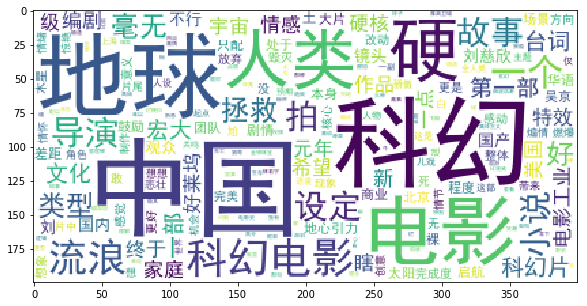

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud#词云包

wordcloud=WordCloud(font_path="simhei.ttf",background_color="white",max_font_size=80) #指定字体类型、字体大小和字体颜色
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
word_frequence_list = []
for key in word_frequence:
    temp = (key,word_frequence[key])
    word_frequence_list.append(temp)

wordcloud=wordcloud.fit_words(dict(word_frequence_list))
plt.imshow(wordcloud)